In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
%matplotlib inline

In [2]:
!ls data/

_97bd1c1e5df9537bb13398c9898deed7_detroit-blight-violations.csv
buildings.csv
_dcebfb2135a2bf5a6392493bd61aba22_detroit-311.csv
_dcebfb2135a2bf5a6392493bd61aba22_detroit-crime.csv
_dcebfb2135a2bf5a6392493bd61aba22_detroit-demolition-permits.tsv


In [3]:
crime_data = pd.read_csv("data/_dcebfb2135a2bf5a6392493bd61aba22_detroit-crime.csv")
crime_data.shape

/usr/local/lib/python2.7/dist-packages/IPython/core/interactiveshell.py:2902: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


(119931, 17)

In [4]:
crime_data.head()

,ROWNUM,CASEID,INCINO,CATEGORY,OFFENSEDESCRIPTION,STATEOFFENSEFILECLASS,INCIDENTDATE,HOUR,SCA,PRECINCT,COUNCIL,NEIGHBORHOOD,CENSUSTRACT,ADDRESS,LON,LAT,LOCATION
0,53256,1953933,1506030028.1,ASSAULT,ASSAULT AND BATTERY/SIMPLE ASSAULT,13001.0,06/03/2015 12:00:00 AM,2,1007.0,10.0,City Council District 5,PETOSKEY-OTSEGO,5334.0,09100 PETOSKEY,-83.1221,42.3678,"PETOSKEY\n09100\n(42.3676, -83.1219)"
1,17631,1917717,1503010158.1,LARCENY,LARCENY - PARTS AND ACCESSORIES FROM VEHICLE,23006.0,03/01/2015 12:00:00 AM,9,608.0,6.0,City Council District 7,GRANDALE,5452.0,00 PLYMOUTH AND MANSFIELD,-83.2035,42.3724,"00 PLYMOUTH AND MANSFIELD\n(42.3725, -83.2033)"
2,11207,1910955,1502080223.1,STOLEN VEHICLE,VEHICLE THEFT,24001.0,02/08/2015 12:00:00 AM,18,1105.0,11.0,City Council District 3,OUTER DRIVE VAN DYKE,5051.0,00 E 7 MILE VAN DYKE,-83.0241,42.4338,"00 E 7 MILE VAN DYKE\n(42.4339, -83.0241)"
3,116589,2018186,1511090188.1,WEAPONS OFFENSES,WEAPONS OFFENSE (OTHER),52003.0,11/09/2015 12:00:00 AM,12,210.0,2.0,City Council District 6,TIREMAN,NaN,06600 BARTON,-83.1381,42.3496,"BARTON\n06600\n(42.3494, -83.1379)"
4,85790,1986862,1508239803.1,LARCENY,LARCENY - PARTS AND ACCESSORIES FROM VEHICLE,23006.0,08/14/2015 12:00:00 AM,7,309.0,3.0,City Council District 6,WEST CANFIELD,5204.0,00900 W WILLIS,-83.0692,42.3481,"W WILLIS\n00900\n(42.3481, -83.0693)"


In [5]:
crime_data.columns

Index([u'ROWNUM', u'CASEID', u'INCINO', u'CATEGORY', u'OFFENSEDESCRIPTION',
       u'STATEOFFENSEFILECLASS', u'INCIDENTDATE', u'HOUR', u'SCA', u'PRECINCT',
       u'COUNCIL', u'NEIGHBORHOOD', u'CENSUSTRACT', u'ADDRESS', u'LON', u'LAT',
       u'LOCATION'],
      dtype='object')

In [6]:
demolition_data = pd.read_csv("data/_dcebfb2135a2bf5a6392493bd61aba22_detroit-demolition-permits.tsv", sep='\t')
demolition_data.head()

,PERMIT_NO,PERMIT_APPLIED,PERMIT_ISSUED,PERMIT_EXPIRES,SITE_ADDRESS,BETWEEN1,PARCEL_NO,LOT_NUMBER,SUBDIVISION,CASE_TYPE,...,CONTRACTOR_ADDRESS1,CONTRACTOR_ADDRESS2,CONTRACTOR_CITY,CONTRACTOR_STATE,CONTRACTOR_ZIP,CONDITION_FOR_APPROVAL,site_location,owner_location,contractor_location,geom
0,BLD2015-03955,8/28/15,8/28/15,NaN,4331 BARHAM,BETWEEN VOIGHT AND WAVENEY,21 65525-6,S15,NaN,BLD,...,13500 FOLEY,NaN,DETROIT,NaN,48227.0,NaN,"4331 BARHAM\nDetroit, MI\n(42.394106, -82.9474)","65 CADILLAC\nDETROIT, MI\n(42.331741326000042,...","13500 FOLEY\nDETROIT, MI\n(42.379332, -83.177501)",NaN
1,BLD2015-04083,8/28/15,8/28/15,NaN,9707 BESSEMORE,BETWEEN VINTON AND GRATIOT,19 2312.,40,NaN,BLD,...,13500 FOLEY,NaN,DETROIT,NaN,48227.0,NaN,"9707 BESSEMORE\nDetroit, MI\n(42.395122, -83.0...","65 CADILLAC\nDETROIT, MI\n(42.331741326000042,...","13500 FOLEY\nDETROIT, MI\n(42.379332, -83.177501)",NaN
2,BLD2015-03976,8/28/15,8/28/15,NaN,5315 BERKSHIRE,BETWEEN SOUTHAMPTON AND FRANKFORT,21 69321.,445,NaN,BLD,...,13500 FOLEY,NaN,DETROIT,NaN,48227.0,NaN,"5315 BERKSHIRE\nDetroit, MI\n(42.40322, -82.94...","65 CADILLAC\nDETROIT, MI\n(42.331741326000042,...","13500 FOLEY\nDETROIT, MI\n(42.379332, -83.177501)",NaN
3,BLD2015-03781,8/28/15,8/28/15,NaN,16670 BRINGARD DR,BETWEEN CUSHING AND SHAKESPEARE,21 25930.,97,NaN,BLD,...,13500 FOLEY,NaN,DETROIT,NaN,48227.0,NaN,"16670 BRINGARD DR\nDetroit, MI\n(42.44664, -82...","65 CADILLAC\nDETROIT, MI\n(42.331741326000042,...","13500 FOLEY\nDETROIT, MI\n(42.379332, -83.177501)",NaN
4,BLD2015-03677,8/28/15,8/28/15,NaN,1454 BEATRICE,BETWEEN TORONTO AND GILROY,20 12871.012,21,NaN,BLD,...,13500 FOLEY,NaN,DETROIT,NaN,48227.0,NaN,"1454 BEATRICE\nDetroit, MI\n(42.276956, -83.14...","65 CADILLAC\nDETROIT, MI\n(42.331741326000042,...","13500 FOLEY\nDETROIT, MI\n(42.379332, -83.177501)",NaN


In [7]:
demolition_data.shape

(7133, 55)

In [8]:
demolition_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7133 entries, 0 to 7132
Data columns (total 55 columns):
PERMIT_NO                 7133 non-null object
PERMIT_APPLIED            7133 non-null object
PERMIT_ISSUED             7133 non-null object
PERMIT_EXPIRES            6953 non-null object
SITE_ADDRESS              7133 non-null object
BETWEEN1                  7091 non-null object
PARCEL_NO                 7133 non-null object
LOT_NUMBER                7062 non-null object
SUBDIVISION               6087 non-null object
CASE_TYPE                 7133 non-null object
CASE_DESCRIPTION          7133 non-null object
LEGAL_USE                 6689 non-null object
ESTIMATED_COST            342 non-null object
PARCEL_SIZE               7088 non-null float64
PARCEL_CLUSTER_SECTOR     7122 non-null float64
STORIES                   5707 non-null float64
PARCEL_FLOOR_AREA         7088 non-null float64
PARCEL_GROUND_AREA        7088 non-null float64
PRC_AKA_ADDRESS           293 non-null obje

In [9]:
demolition_data.CASE_DESCRIPTION.unique()

array(['Building Permit'], dtype=object)

In [10]:
demolition_data.CASE_TYPE.unique()

array(['BLD'], dtype=object)

In [11]:
demolition_data.PERMIT_DESCRIPTION.unique()

array([nan, 'Dismantle'], dtype=object)

In [12]:
demolition_data.BLD_PERMIT_TYPE.unique()

array(['Dismantle', 'DISM'], dtype=object)

In [13]:
def add_latlon(df, col):
    """Add latlon column to the df by extracting from col"""
    df_ = df.copy()    
    df_[col] = df_[col].fillna('')

    geo_pat = re.compile('\((.+), (.+)\)')
    df_['lat'] = df_[col].apply(lambda x: float(re.search(geo_pat, x).group(1)) if re.search(geo_pat, x) else np.nan)
    df_['lon'] = df_[col].apply(lambda x: float(re.search(geo_pat, x).group(2)) if re.search(geo_pat, x) else np.nan)
#     geo_pat = re.compile('\((.+)\)')
#     df_['latlon'] = df_[col].apply(lambda x: re.search(geo_pat, x).group(1) if re.search(geo_pat, x) else np.nan)

    return df_

In [14]:
from geopy.distance import distance
def get_distance(A, B):
    return distance((A[0], A[1]), (B[0], B[1])).meters

In [15]:
demolition_df = demolition_data.dropna(subset=['site_location'])
demolition_df = add_latlon(demolition_df, 'site_location')

In [16]:
demolition_df.lat.head()

0    42.394106
1    42.395122
2    42.403220
3    42.446640
4    42.276956
Name: lat, dtype: float64

In [17]:
buildings_df = pd.read_csv("data/buildings.csv", index_col='No')

In [75]:
# def get_buildings(lat, lon, r=20):
#     """Given lat, lon, return building No. from building_df.
#     Building is defined as a circle of radius 20m
#     """
#     try:
#         dist = buildings_df.apply(lambda x: get_distance((x.lat, x.lon), (lat, lon)), axis=1)
#         return dist[dist < r].index.to_list()
#     except AttributeError:
#         return ''

### Use knn model for labeling new data
row-wise calculation is too slow. knn uses tree structure and parallelization to speed up

In [18]:
from sklearn.neighbors import KNeighborsClassifier

In [19]:
model = KNeighborsClassifier(n_neighbors=1, algorithm='kd_tree', n_jobs=10)

In [20]:
model.fit(buildings_df[['lat', 'lon']].values, buildings_df.index)

KNeighborsClassifier(algorithm='kd_tree', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=10, n_neighbors=1, p=2,
           weights='uniform')

In [21]:
buildings_df.head()

,lat,lon
No,,
0,42.363186,-83.091669
1,42.429329,-83.220389
2,42.428929,-83.227529
3,42.441671,-83.144992
4,42.418294,-83.153599


In [22]:
X = demolition_df[['lat', 'lon']].dropna()
X['building_no'] = model.predict(X.values)

In [23]:
## total number of demolished buildings
len(X.building_no.unique())

4003

In [24]:
1 in X.building_no

True

In [25]:
buildings_df['demolished'] = buildings_df.index.isin(X.building_no)

In [26]:
buildings_df.head(10)

,lat,lon,demolished
No,,,
0,42.363186,-83.091669,False
1,42.429329,-83.220389,False
2,42.428929,-83.227529,False
3,42.441671,-83.144992,False
4,42.418294,-83.153599,False
5,42.420965,-83.153742,False
6,42.331681,-83.047996,True
7,42.427744,-83.144551,False
8,42.352897,-83.223485,False


In [27]:
buildings_df.demolished.value_counts()

False    36266
True      4003
Name: demolished, dtype: int64

In [28]:
buildings_df[buildings_df.demolished == False].sample(10)

,lat,lon,demolished
No,,,
25325,42.396130,-82.981240,False
23735,42.358760,-83.190454,False
15411,42.446368,-83.091218,False
32983,42.412349,-82.949157,False
31839,42.445207,-83.071958,False
10573,42.366347,-82.996833,False
35897,42.366561,-83.011688,False
1377,42.383866,-82.965223,False
14040,42.372145,-83.102880,False


In [141]:
train_data = pd.concat([buildings_df[buildings_df.demolished == False].sample(4003),
                        buildings_df[buildings_df.demolished == True]])

In [122]:
train_data.head()

,lat,lon,demolished
No,,,
33856,42.446342,-82.960440,False
28720,42.384608,-83.008794,False
35993,42.420631,-83.145264,False
37202,42.379066,-83.108510,False
15644,42.370903,-83.197472,False


In [30]:
incident_data = pd.read_csv("data/_97bd1c1e5df9537bb13398c9898deed7_detroit-blight-violations.csv")
incident_data.head()

/usr/local/lib/python2.7/dist-packages/IPython/core/interactiveshell.py:2902: DtypeWarning: Columns (6,10,11,12) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,TicketID,TicketNumber,AgencyName,ViolName,ViolationStreetNumber,ViolationStreetName,MailingStreetNumber,MailingStreetName,MailingCity,MailingState,...,AdminFee,LateFee,StateFee,CleanUpCost,JudgmentAmt,PaymentStatus,Void,ViolationCategory,ViolationAddress,MailingAddress
0,26288,05000001DAH,Department of Public Works,"Group, LLC, Grand Holding",2566,GRAND BLVD,743,"Beaubien, Ste. 201",Detroit,MI,...,$20.00,$150.00,$10.00,$0.00,$1680.00,PAID IN FULL,0.0,0,"2566 GRAND BLVD\nDetroit, MI\n(42.363182370000...","743 Beaubien\nDetroit, MI 48226\n(42.333730630..."
1,19800,05000025DAH,Department of Public Works,"JACKSON, RAECHELLE",19014,ASHTON,20501,HEYDEN,DETROIT,MI,...,$20.00,$10.00,$10.00,$0.00,$140.00,NO PAYMENT APPLIED,0.0,0,"19014 ASHTON\nDetroit, MI\n(42.429390762000025...","20501 HEYDEN\nDETROIT, MI 48219\n(42.442177633..."
2,19804,05000026DAH,Department of Public Works,"TALTON, CAROL ANN",18735,STAHELIN,18735,STAHELI N,DETROIT,MI,...,$20.00,$10.00,$10.00,$0.00,$140.00,PAID IN FULL,0.0,0,"18735 STAHELIN\nDetroit, MI\n(42.4287074590000...","18735 STAHELI N\nDETROIT, MI 48219\n(42.428707..."
3,20208,05000027DAH,Department of Public Works,"BONNER, DARRYL E.",20125,MONICA,25335,PEEKSKILL,SOUTHFIELD,MI,...,$20.00,$10.00,$10.00,$0.00,$140.00,NO PAYMENT APPLIED,0.0,0,"20125 MONICA\nDetroit, MI\n(42.44169828400004,...","25335 PEEKSKILL\nSOUTHFIELD, MI 48043\n(42.475..."
4,20211,05000028DAH,Department of Public Works,"GREGORY, JAMES LEE",17397,PRAIRIE,17397,PRAIRIE,DETROIT,MI,...,$20.00,$10.00,$10.00,$0.00,$140.00,PAID IN FULL,0.0,0,"17397 PRAIRIE\nDetroit, MI\n(42.42031769500005...","17397 PRAIRIE\nDETROIT, MI 48221\n(42.42031769..."


In [31]:
inci_df = incident_data.copy()
geo_pat = re.compile('\((.+), (.+)\)')
inci_df['lat'] = inci_df.ViolationAddress.apply(lambda x: float(re.search(geo_pat, x).group(1)))
inci_df['lon'] = inci_df.ViolationAddress.apply(lambda x: float(re.search(geo_pat, x).group(2)))

#### build feature:
- number of blight violations for each building

In [32]:
inci_df['building_no'] = model.predict(inci_df[['lat', 'lon']])

In [92]:
inci_df.columns

Index([u'TicketID', u'TicketNumber', u'AgencyName', u'ViolName',
       u'ViolationStreetNumber', u'ViolationStreetName',
       u'MailingStreetNumber', u'MailingStreetName', u'MailingCity',
       u'MailingState', u'MailingZipCode', u'NonUsAddressCode', u'Country',
       u'TicketIssuedDT', u'TicketIssuedTime', u'HearingDT', u'CourtTime',
       u'ViolationCode', u'ViolDescription', u'Disposition', u'FineAmt',
       u'AdminFee', u'LateFee', u'StateFee', u'CleanUpCost', u'JudgmentAmt',
       u'PaymentStatus', u'Void', u'ViolationCategory', u'ViolationAddress',
       u'MailingAddress', u'lat_x', u'lon_x', u'building_no', u'lat_y',
       u'lon_y', u'demolished'],
      dtype='object')

In [91]:
len(inci_df.building_no.unique())

40269

In [118]:
inci_df.groupby(['demolished', 'PaymentStatus']).count()

TicketID  TicketNumber  AgencyName  ViolName  \
demolished PaymentStatus                                                        
False      NO PAYMENT APPLIED      185831        185831      185831    185831   
           NO PAYMENT ON RECORD     11346         11346       11346     11346   
           PAID IN FULL             34117         34117       34117     34117   
           PARTIAL PAYMENT MADE      3561          3561        3561      3561   
True       NO PAYMENT APPLIED       58472         58472       58472     58472   
           NO PAYMENT ON RECORD      3219          3219        3219      3217   
           PAID IN FULL             10202         10202       10202     10202   
           PARTIAL PAYMENT MADE      1056          1056        1056      1056   

                                 ViolationStreetNumber  ViolationStreetName  \
demolished PaymentStatus                                                      
False      NO PAYMENT APPLIED                   185831               185831   
           NO PAYMENT ON RECORD                  11346                11346   
           PAID IN FULL                          34117                34117   
           PARTIAL PAYMENT MADE                   3561                 3561   
True       NO PAYMENT APPLIED                    58472                58472   
           NO PAYMENT ON RECORD                   3219                 3219   
           PAID IN FULL                          10202                10202   
           PARTIAL PAYMENT MADE                   1056                 1056   

                                 MailingStreetNumber  MailingStreetName  \
demolished PaymentStatus                                                  
False      NO PAYMENT APPLIED                 185830             185831   
           NO PAYMENT ON RECORD                11346              11346   
           PAID IN FULL                        34116              34117   
           PARTIAL PAYMENT MADE                 3561               3561   
True       NO PAYMENT APPLIED                  58472              58472   
           NO PAYMENT ON RECORD                 3219               3219   
           PAID IN FULL                        10202              10202   
           PARTIAL PAYMENT MADE                 1056               1056   

                                 MailingCity  MailingState   ...    \
demolished PaymentStatus                                     ...     
False      NO PAYMENT APPLIED         185831        185535   ...     
           NO PAYMENT ON RECORD        11043         11040   ...     
           PAID IN FULL                34066         34007   ...     
           PARTIAL PAYMENT MADE         3557          3550   ...     
True       NO PAYMENT APPLIED          58472         58393   ...     
           NO PAYMENT ON RECORD         3156          3150   ...     
           PAID IN FULL                10201         10188   ...     
           PARTIAL PAYMENT MADE         1056          1053   ...     

                                 JudgmentAmt   Void  ViolationCategory  \
demolished PaymentStatus                                                 
False      NO PAYMENT APPLIED         185831  48077             185831   
           NO PAYMENT ON RECORD         9772  11346              11346   
           PAID IN FULL                34114  14494              34117   
           PARTIAL PAYMENT MADE         3561   1429               3561   
True       NO PAYMENT APPLIED          58472  15682              58472   
           NO PAYMENT ON RECORD         2826   3219               3219   
           PAID IN FULL                10200   4467              10202   
           PARTIAL PAYMENT MADE         1056    419               1056   

                                 ViolationAddress  MailingAddress   lat_x  \
demolished PaymentStatus                                                    
False      NO PAYMENT APPLIED              185831          184970  185831   
       

In [123]:
train_data = pd.merge(train_data, pd.crosstab(inci_df.building_no, inci_df.ViolationCode),
                      how='left', left_index=True, right_index=True)

In [94]:
train_data.shape

(8006, 268)

In [95]:
building_violation_counts = inci_df.building_no.value_counts()

In [142]:
train_data['violation_counts'] = building_violation_counts[train_data.index]

In [100]:
train_data.head()

,lat,lon,demolished,22-2-16,22-2-17,22-2-17(a),22-2-18,22-2-19,22-2-20,22-2-21(a),...,9/1/1942,9/1/1945,9/1/1983,9/1/1984,9/1/1985,9/1/1991,9/1/2013,9/1/2016,9/1/2018,violation_counts
No,,,,,,,,,,,,,,,,,,,,,
153,42.406767,-83.150624,False,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,17
26958,42.350376,-83.233962,False,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4
6829,42.356953,-83.023771,False,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4
37159,42.412915,-82.913291,False,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1133,42.403182,-83.253314,False,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,15


In [69]:
train_df.PaymentStatus.unique()

array(['PARTIAL PAYMENT MADE', 'NO PAYMENT APPLIED', 'PAID IN FULL',
       'NO PAYMENT ON RECORD'], dtype=object)

In [143]:
train_data = pd.merge(train_data, pd.crosstab(inci_df.building_no, inci_df.PaymentStatus),
                      how='left', left_index=True, right_index=True)

In [145]:
train_data.shape

(8006, 8)

In [149]:
crime_data.columns

Index([u'ROWNUM', u'CASEID', u'INCINO', u'CATEGORY', u'OFFENSEDESCRIPTION',
       u'STATEOFFENSEFILECLASS', u'INCIDENTDATE', u'HOUR', u'SCA', u'PRECINCT',
       u'COUNCIL', u'NEIGHBORHOOD', u'CENSUSTRACT', u'ADDRESS', u'LON', u'LAT',
       u'LOCATION'],
      dtype='object')

In [239]:
crime_data.head()

,ROWNUM,CASEID,INCINO,CATEGORY,OFFENSEDESCRIPTION,STATEOFFENSEFILECLASS,INCIDENTDATE,HOUR,SCA,PRECINCT,COUNCIL,NEIGHBORHOOD,CENSUSTRACT,ADDRESS,LON,LAT,LOCATION,building_no
0,53256,1953933,1506030028.1,ASSAULT,ASSAULT AND BATTERY/SIMPLE ASSAULT,13001.0,06/03/2015 12:00:00 AM,2,1007.0,10.0,City Council District 5,PETOSKEY-OTSEGO,5334.0,09100 PETOSKEY,-83.1221,42.3678,"PETOSKEY\n09100\n(42.3676, -83.1219)",5586
1,17631,1917717,1503010158.1,LARCENY,LARCENY - PARTS AND ACCESSORIES FROM VEHICLE,23006.0,03/01/2015 12:00:00 AM,9,608.0,6.0,City Council District 7,GRANDALE,5452.0,00 PLYMOUTH AND MANSFIELD,-83.2035,42.3724,"00 PLYMOUTH AND MANSFIELD\n(42.3725, -83.2033)",12289
2,11207,1910955,1502080223.1,STOLEN VEHICLE,VEHICLE THEFT,24001.0,02/08/2015 12:00:00 AM,18,1105.0,11.0,City Council District 3,OUTER DRIVE VAN DYKE,5051.0,00 E 7 MILE VAN DYKE,-83.0241,42.4338,"00 E 7 MILE VAN DYKE\n(42.4339, -83.0241)",15158
3,116589,2018186,1511090188.1,WEAPONS OFFENSES,WEAPONS OFFENSE (OTHER),52003.0,11/09/2015 12:00:00 AM,12,210.0,2.0,City Council District 6,TIREMAN,NaN,06600 BARTON,-83.1381,42.3496,"BARTON\n06600\n(42.3494, -83.1379)",22640
4,85790,1986862,1508239803.1,LARCENY,LARCENY - PARTS AND ACCESSORIES FROM VEHICLE,23006.0,08/14/2015 12:00:00 AM,7,309.0,3.0,City Council District 6,WEST CANFIELD,5204.0,00900 W WILLIS,-83.0692,42.3481,"W WILLIS\n00900\n(42.3481, -83.0693)",28580


In [260]:
def add_label(df, building_index=False):
    if building_index: #df's index is building no.
        tdf = pd.merge(df, buildings_df, left_index=True, right_index=True, how='left')
    else:
        tdf = pd.merge(df, buildings_df, left_on='building_no', right_index=True, how='left')
    return tdf

def subsample_df(df):
    return pd.concat([df[df.demolished == False].sample(4003),
                        df[df.demolished == True]])


In [256]:
tdf = add_label(crime_data)
tdf['dummy'] = 1

In [261]:
ttdf = tdf.pivot_table(index='building_no', columns='CATEGORY', values='dummy').fillna(0)
ttdf = add_label(ttdf, building_index=True)

In [263]:
## seems the different categories of crime does not correlate to demolishment
ttdf.demolished = ttdf.demolished.astype(int)
ttdf.corr()['demolished']

CATEGORY
AGGRAVATED ASSAULT                             0.003939
ANTITRUST                                      0.003495
ARSON                                          0.027938
ASSAULT                                       -0.006833
BRIBERY                                        0.004082
BURGLARY                                      -0.025561
CONGRESS                                       0.008132
CONSPIRACY BY COMPUTER                         0.003117
DAMAGE TO PROPERTY                            -0.014091
DANGEROUS DRUGS                                0.033096
DRUNKENNESS                                   -0.003268
ELECTION LAWS                                  0.003439
EMBEZZLEMENT                                   0.001760
ENVIRONMENT                                    0.007608
ESCAPE                                        -0.002110
EXTORTION                                      0.001731
FAMILY OFFENSE                                -0.003066
FELONY DEATH FROM FLEEING VEHICLE      

In [267]:
### Remove outliers from crime data
buildings_df.describe()

,lat,lon
count,40269.000000,40269.000000
mean,42.389958,-83.108051
std,0.035849,0.097033
min,42.255342,-83.287664
25%,42.364167,-83.188941
50%,42.393257,-83.119054
75%,42.419537,-83.022759
max,42.449452,-82.910654


In [271]:
mask = (crime_data['LAT'] >= 42.255) & (crime_data.LAT <= 42.450) \
       & (crime_data.LON >= -83.287) & (crime_data.LON <= -82.911)
original_size = crime_data.shape[0]
crime_data = crime_data[mask]
print original_size - crime_data.shape[0]

572


In [158]:
train_data = pd.merge(train_data, pd.crosstab(crime_data.building_no, crime_data.CATEGORY),
                      how='left', left_index=True, right_index=True)

In [162]:
train_data.fillna(0, inplace=True)

In [163]:
train_data.groupby('demolished').mean()

,lat,lon,violation_counts,NO PAYMENT APPLIED,NO PAYMENT ON RECORD,PAID IN FULL,PARTIAL PAYMENT MADE,AGGRAVATED ASSAULT,ANTITRUST,ARSON,...,RUNAWAY,SOLICITATION,SOVEREIGNTY,STOLEN PROPERTY,STOLEN VEHICLE,TAX REVENUE,TRAFFIC VIOLATIONS-DRIVING ON SUSPENDED,TRAFFIC VIOLATIONS-MOTORCYCLE VIOLATIONS,VAGRANCY (OTHER),WEAPONS OFFENSES
demolished,,,,,,,,,,,,,,,,,,,,,
False,42.389984,-83.111373,6.437172,5.105171,0.301274,0.941794,0.088933,0.210592,0.00025,0.014739,...,0.045466,0.023982,0.0,0.008494,0.180115,0.00025,0.138646,0.787659,0.003248,0.032476
True,42.384212,-83.090413,18.223582,14.607045,0.804147,2.548589,0.263802,0.202848,0.00050,0.027979,...,0.018236,0.017987,0.0,0.010992,0.154134,0.00025,0.237822,0.783912,0.002498,0.032975


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fe2ad018510>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7fe2e665c8d0>]], dtype=object)

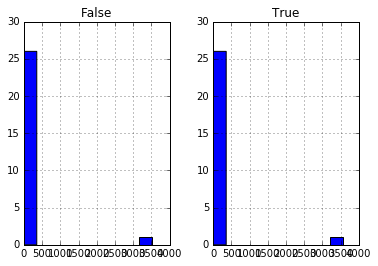

In [171]:
pd.crosstab(train_data['NO PAYMENT ON RECORD'], train_data.demolished).hist()

## Training Model

In [187]:
train_X = train_data.drop(['demolished', 'lat', 'lon'], axis=1)
train_y = train_data.demolished

In [106]:
from sklearn.linear_model.logistic import LogisticRegression
from sklearn import cross_validation

In [188]:
model1 = LogisticRegression(penalty='l1')

In [164]:
model1.fit(train_X, train_data.demolished)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [194]:
cross_validation.cross_val_score(model1, train_X.values, train_y.values,
                                 cv=5, scoring='accuracy')

array([ 0.6741573 ,  0.64794007,  0.62796504,  0.52875   ,  0.408125  ])

In [108]:
from sklearn.ensemble import RandomForestClassifier

In [135]:
model2 = RandomForestClassifier(n_estimators=100, max_depth=5, min_samples_split=10, )

In [180]:
model2.fit(train_X, train_data.demolished)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=5, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=10,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [224]:
cross_validation.cross_val_score(model2, train_X, train_y,
                                 cv=5, scoring='accuracy')

array([ 0.69787765,  0.67977528,  0.59862672,  0.501875  ,  0.306875  ])

In [185]:
sorted(zip(model2.feature_importances_, train_X.columns), reverse=True, )

[(0.29414952528748634, 'NO PAYMENT APPLIED'),
 (0.29052422833395142, 'violation_counts'),
 (0.047172637259436156, 'LARCENY'),
 (0.046133231531382143, 'PAID IN FULL'),
 (0.036310744109957903, 'PARTIAL PAYMENT MADE'),
 (0.029955798064190572, 'TRAFFIC VIOLATIONS-MOTORCYCLE VIOLATIONS'),
 (0.028635637594312514, 'NO PAYMENT ON RECORD'),
 (0.020911230073017092, 'DAMAGE TO PROPERTY'),
 (0.018111665011522046, 'BURGLARY'),
 (0.016593042158859265, 'DANGEROUS DRUGS'),
 (0.015129747704656698, 'FRAUD'),
 (0.014498253683197279, 'ARSON'),
 (0.014470759113003882, 'ASSAULT'),
 (0.01417795437067081, 'TRAFFIC VIOLATIONS-DRIVING ON SUSPENDED'),
 (0.011221322454670486, 'ROBBERY'),
 (0.010909277340118572, 'AGGRAVATED ASSAULT'),
 (0.010619894152438856, 'OBSTRUCTING JUDICIARY'),
 (0.0092247931743124952, 'STOLEN VEHICLE'),
 (0.0083097459265328404, 'ESCAPE'),
 (0.0073972523194542374, 'WEAPONS OFFENSES'),
 (0.0061357665371652523, 'SOLICITATION'),
 (0.0059282708171121655, 'RUNAWAY'),
 (0.0046685561303629738, 'STO

In [191]:
import sklearn.datasets
import sklearn.cross_validation
import sklearn.linear_model
d = sklearn.datasets.load_iris()
X = d.data
y = d.target
sklearn.cross_validation.cross_val_score(sklearn.linear_model.LogisticRegression(), X, y, cv=5, scoring='accuracy')

array([ 1.        ,  0.96666667,  0.93333333,  0.9       ,  1.        ])

In [223]:
sklearn.cross_validation.cross_val_score(sklearn.linear_model.LogisticRegression(), train_X[['violation_counts', 'NO PAYMENT APPLIED']].values, train_y.astype(int).values, cv=5, scoring='accuracy')

array([ 0.70599251,  0.66354557,  0.61735331,  0.496875  ,  0.40875   ])

In [222]:
sklearn.cross_validation.cross_val_score(sklearn.linear_model.LogisticRegression(), train_X[['DRUNKENNESS', 'GAMBLING']].values, train_y.astype(int).values, cv=5, scoring='accuracy')

array([ 0.49937578,  0.5       ,  0.49937578,  0.5       ,  0.5       ])